Name: Santhanabalan V
Roll.No: 20BIS038
E-Mail: santhanabalan.20is@kct.ac.in

# Overview #

The objective of this task is to build a model that predicts the quality of red wine given certain features. Wine quality ranges from 0 (poor) to 10 (excellent).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Inspection and Preprocessing #

In [2]:
data = pd.read_csv('winequality-red.csv')
df = data.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Luckily, this dataset does not have any null (0) values and all inputs are numeric.

# Exploratory Data Analysis #

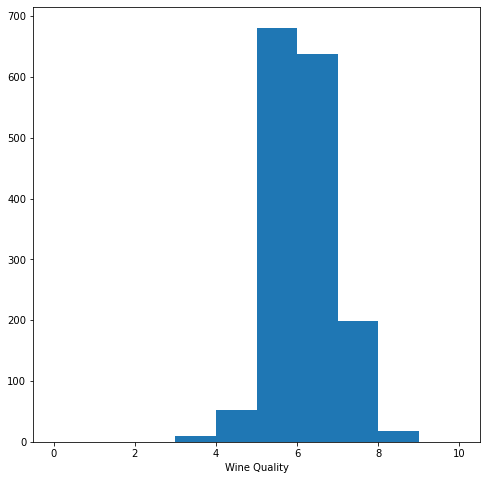

In [4]:
plt.figure(figsize=(8, 8))
plt.hist(df['quality'], range=(0, 10))
plt.xlabel('Wine Quality')
plt.show()

Most of the red wine samples provided fall between 5 and 7 which implies that they are mostly good wine (not excellent).

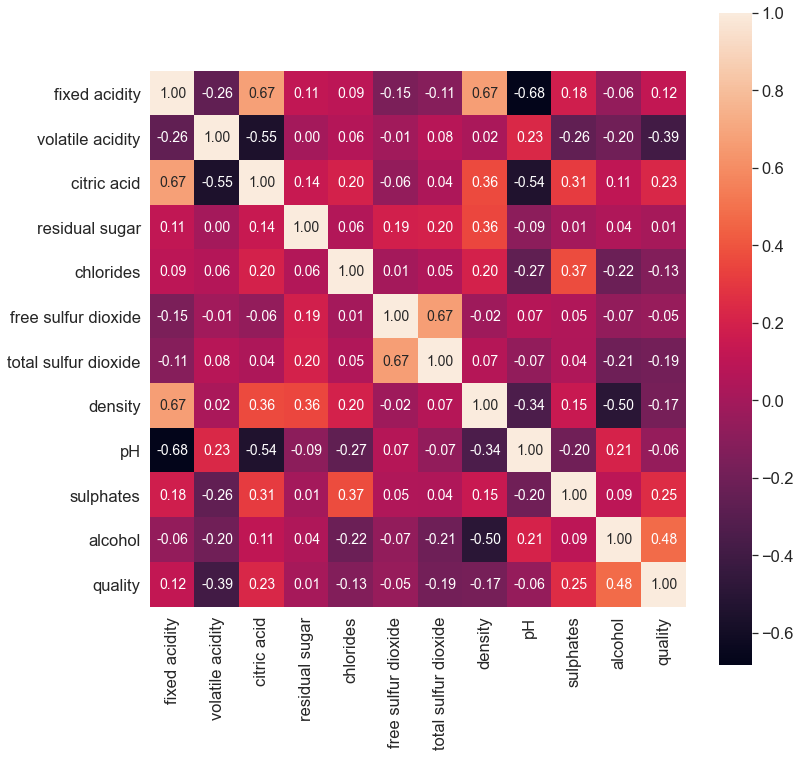

In [5]:
def heatmap(df):
    plt.figure(figsize=(12, 12))
    sns.set(font_scale=1.5)
    sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 14}, yticklabels=df.columns, 
                xticklabels=df.columns)
    plt.show()
    
heatmap(df)

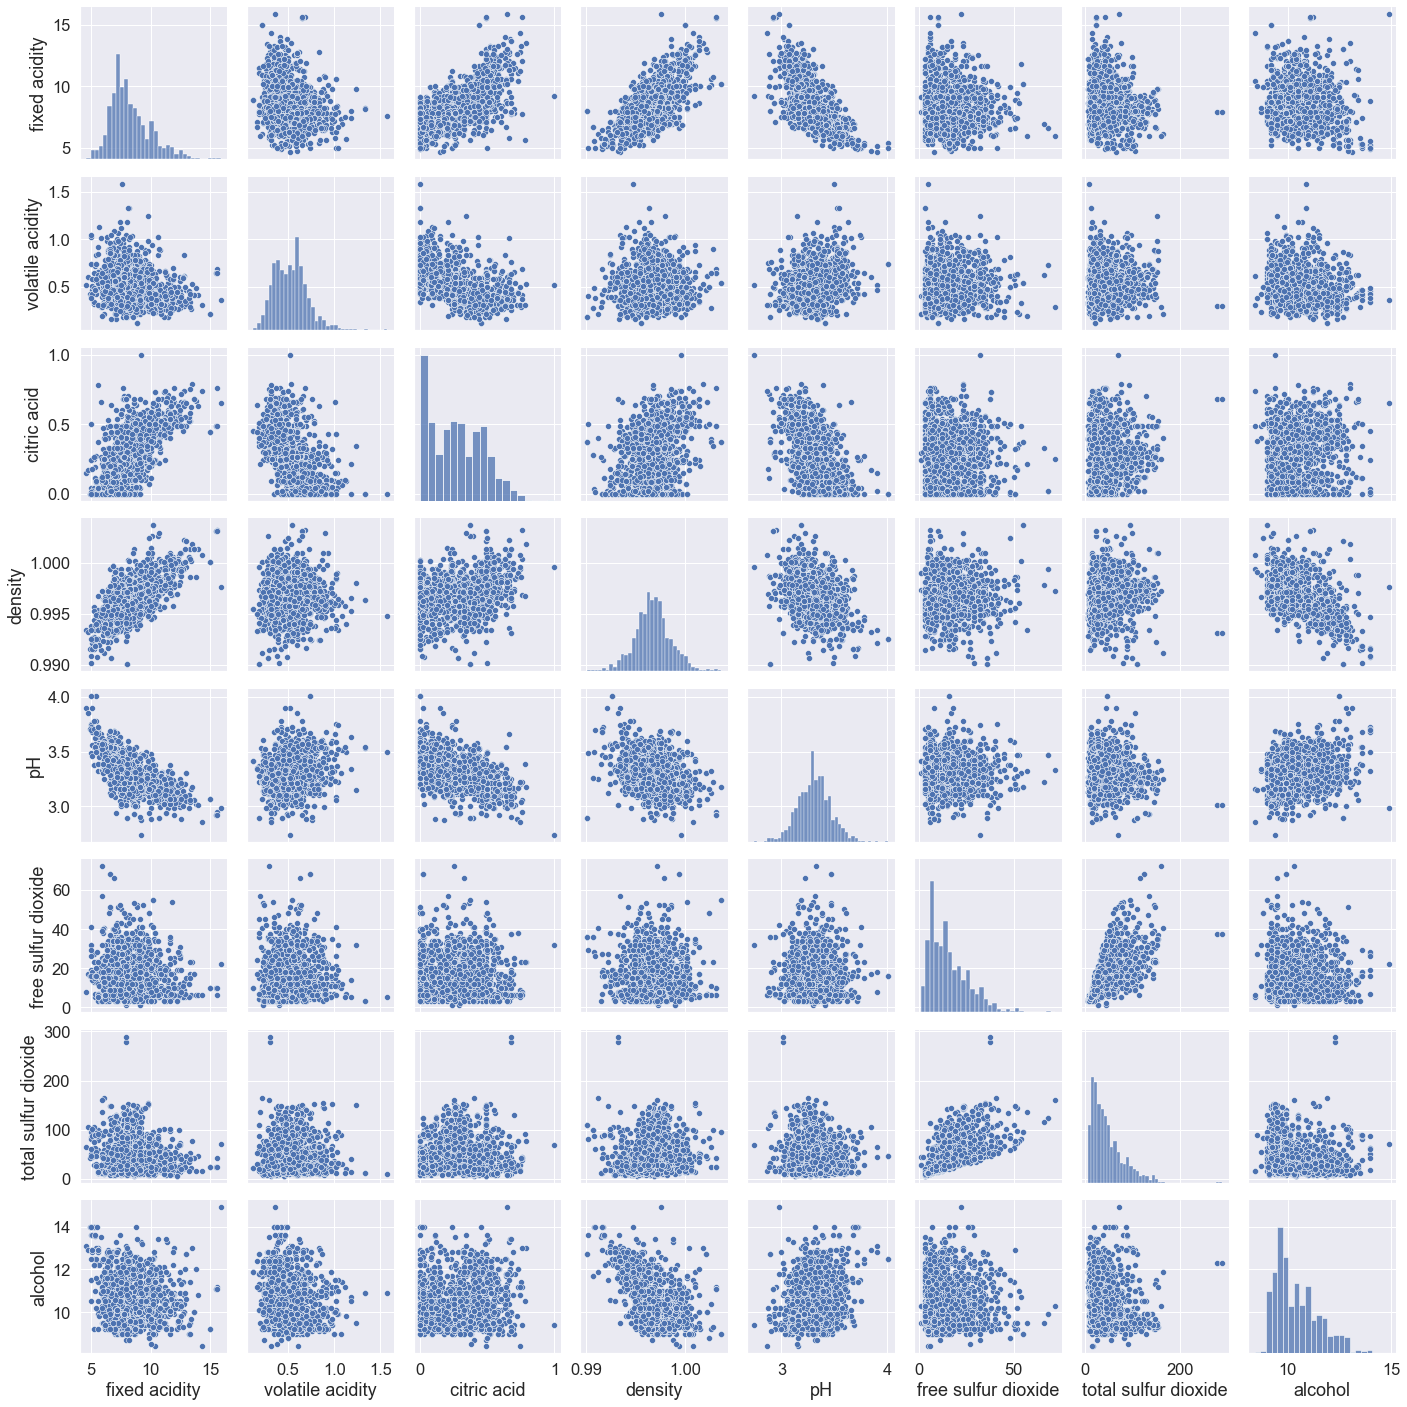

In [6]:
corr_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'pH', 'free sulfur dioxide', 
             'total sulfur dioxide', 'alcohol']

def pairplot(cols):
    sns.pairplot(df[cols])
    plt.show()
    
pairplot(corr_cols)

# Removing Outliers #

In [7]:
from scipy import stats
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import polyfit
import random

def plot_relationship_best_fit(x_axis, x_label, y_axis, y_label, best_fit='linear'):
    fit = None
    
    if best_fit == 'linear':
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
        fit = slope * x_axis + intercept
#         c = polyfit(x_axis, y_axis, 1)
#         fit = c[0] + c[1]*x_axis
    
    if best_fit == 'quadratic':
        popt, pcov = curve_fit(func, x_axis, y_axis)
        fit = func(x_axis, *popt)
        
#         coef = polyfit(x_axis, y_axis, 2)
#         fit = coef[0] + coef[1]*x_axis + coef[2]*(x_axis**2)
        
    np.random.seed(42)
    r = random.randint(0, len(x_axis)-1)
    
    plt.figure(figsize=(8,8))    
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, fit, color='r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def func(x, a, b, c):
    return a*(x**2) + b*x + c

In [8]:
def corr_plot(x_axis, x_label, y_axis, y_label, title=None, legend=None):
    plt.figure(figsize=(8, 8))
    plt.scatter(x_axis, y_axis)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

#### Fixed Acidity & Citric Acid ####

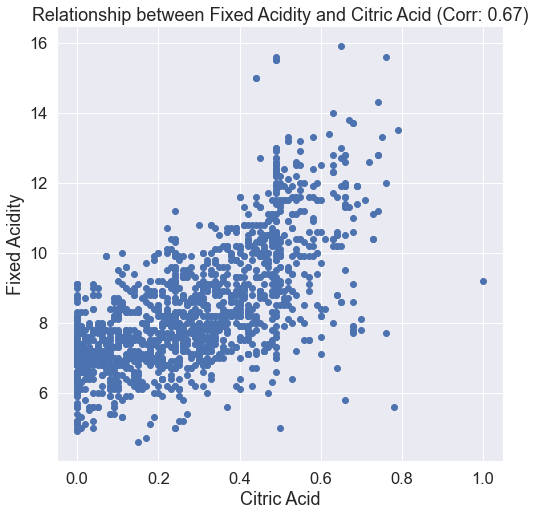

In [9]:
corr = 'Corr: %.2f' % df['fixed acidity'].corr(df['citric acid'])
corr_plot(df['citric acid'], 'Citric Acid', df['fixed acidity'], 'Fixed Acidity', 
          'Relationship between Fixed Acidity and Citric Acid ({})'.format(corr))

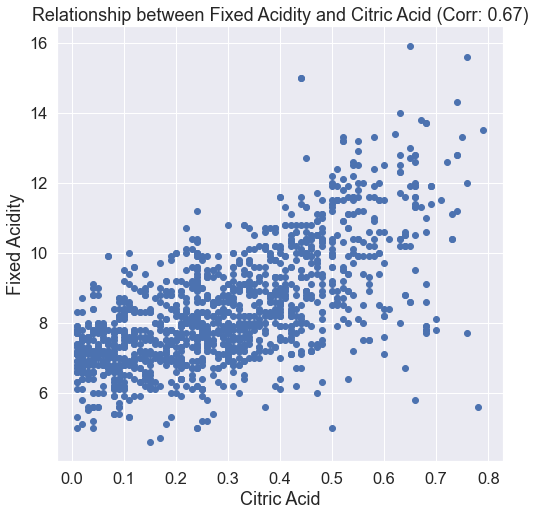

In [10]:
df = df[df['citric acid'] > 0]
df = df[df['citric acid'] != 0.49]
df = df[df['citric acid'] < 1.0]

corr = 'Corr: %.2f' % df['fixed acidity'].corr(df['citric acid'])
corr_plot(df['citric acid'], 'Citric Acid', df['fixed acidity'], 'Fixed Acidity', 
          'Relationship between Fixed Acidity and Citric Acid ({})'.format(corr))

#### Fixed Acidity & Density ####

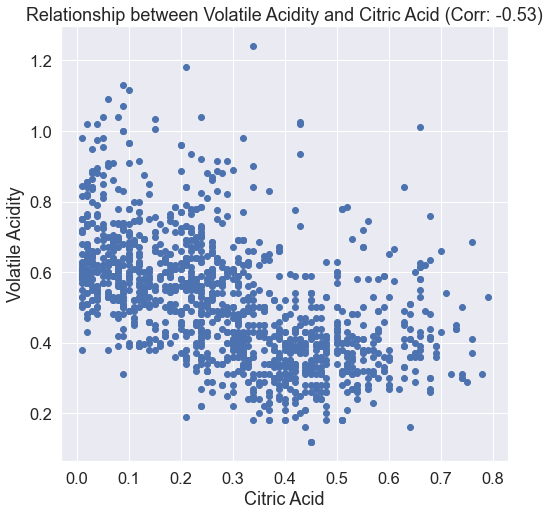

In [11]:
corr = 'Corr: %.2f' % df['volatile acidity'].corr(df['citric acid'])
corr_plot(df['citric acid'], 'Citric Acid', df['volatile acidity'], 'Volatile Acidity', 
          'Relationship between Volatile Acidity and Citric Acid ({})'.format(corr))

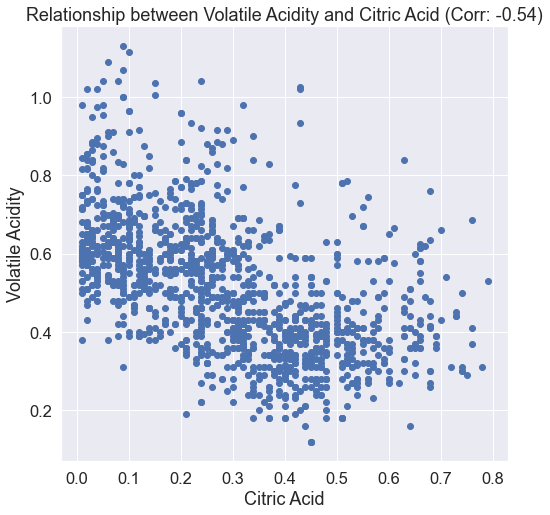

In [12]:
df = df[df['volatile acidity'] < 1.2]
df = df[df['volatile acidity'] != 1.18]
df = df[df['volatile acidity'] != 1.01]

corr = 'Corr: %.2f' % df['volatile acidity'].corr(df['citric acid'])
corr_plot(df['citric acid'], 'Citric Acid', df['volatile acidity'], 'Volatile Acidity', 
          'Relationship between Volatile Acidity and Citric Acid ({})'.format(corr))

#### Citric Acid & pH ####

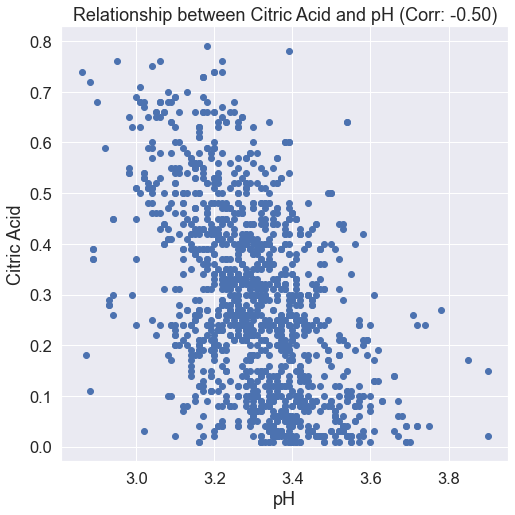

In [13]:
corr = 'Corr: %.2f' % df['citric acid'].corr(df['pH'])
corr_plot(df['pH'], 'pH', df['citric acid'], 'Citric Acid', 
          'Relationship between Citric Acid and pH ({})'.format(corr))

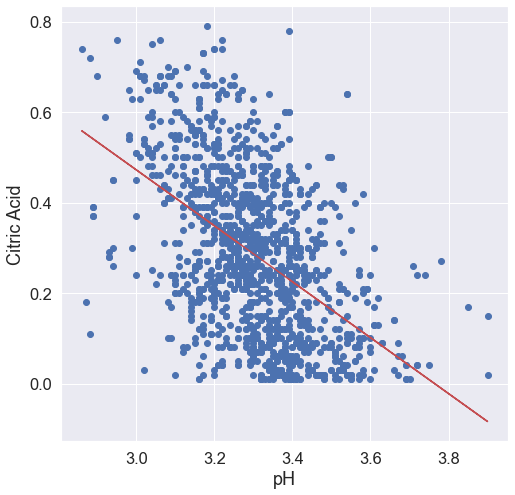

In [14]:
plot_relationship_best_fit(df['pH'], 'pH', df['citric acid'], 'Citric Acid')

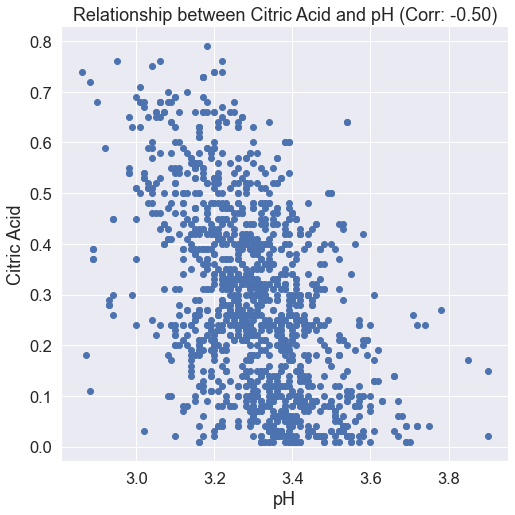

In [15]:
df = df[df['citric acid'] != 0.78]

corr = 'Corr: %.2f' % df['citric acid'].corr(df['pH'])
corr_plot(df['pH'], 'pH', df['citric acid'], 'Citric Acid', 
          'Relationship between Citric Acid and pH ({})'.format(corr))

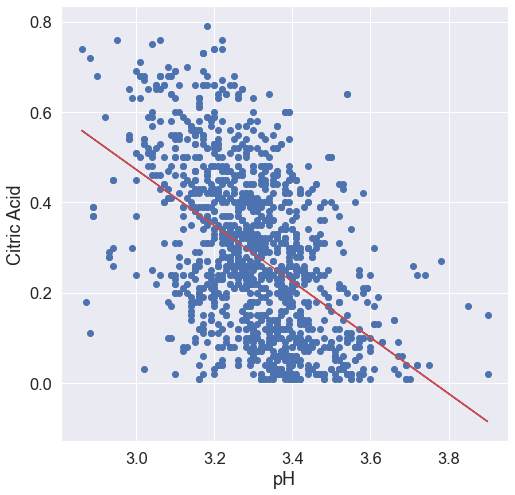

In [16]:
plot_relationship_best_fit(df['pH'], 'pH', df['citric acid'], 'Citric Acid')

#### Density & Fixed Acidity ####

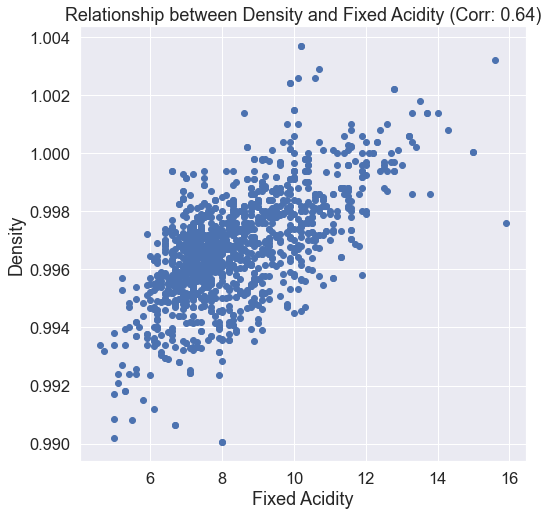

In [17]:
corr = 'Corr: %.2f' % df['density'].corr(df['fixed acidity'])
corr_plot(df['fixed acidity'], 'Fixed Acidity', df['density'], 'Density', 
          'Relationship between Density and Fixed Acidity ({})'.format(corr))

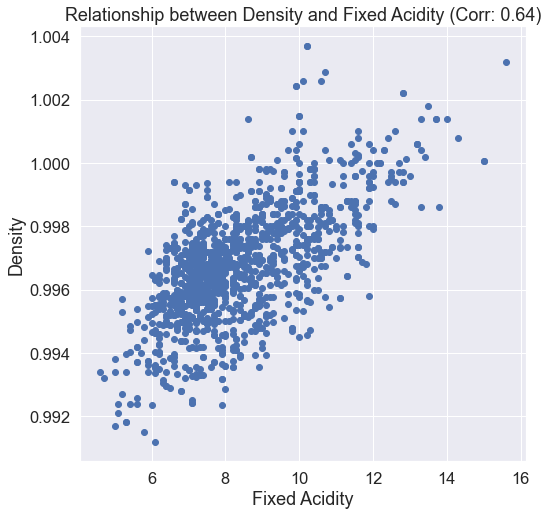

In [18]:
df = df[df['density'] > 0.991]
df = df[df['fixed acidity'] != 15.9]

corr_plot(df['fixed acidity'], 'Fixed Acidity', df['density'], 'Density', 
          'Relationship between Density and Fixed Acidity ({})'.format(corr))

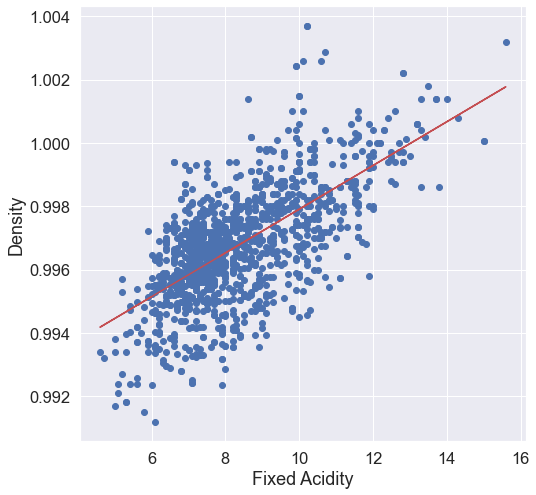

In [19]:
plot_relationship_best_fit(df['fixed acidity'], 'Fixed Acidity', df['density'], 'Density')

#### Density & Alcohol ####

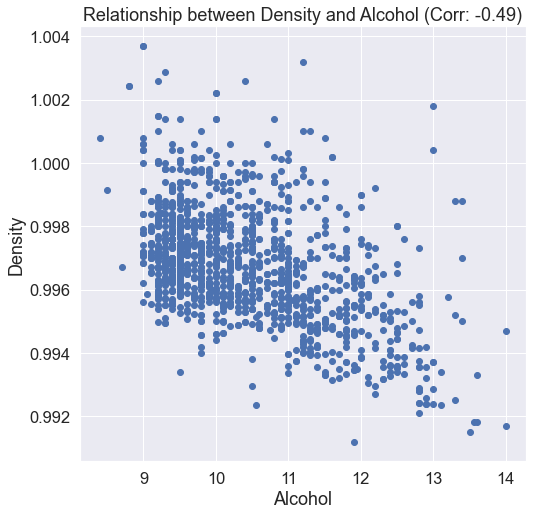

In [20]:
corr = 'Corr: %.2f' % df['density'].corr(df['alcohol'])
corr_plot(df['alcohol'], 'Alcohol', df['density'], 'Density', 
          'Relationship between Density and Alcohol ({})'.format(corr))

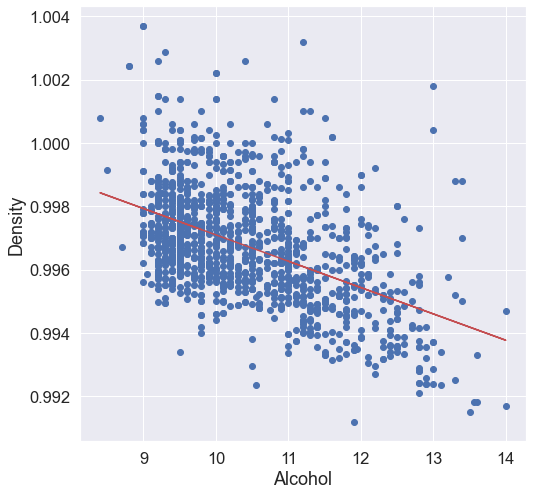

In [21]:
plot_relationship_best_fit(df['alcohol'], 'Alcohol', df['density'], 'Density')

#### pH & Fixed Acidity ####

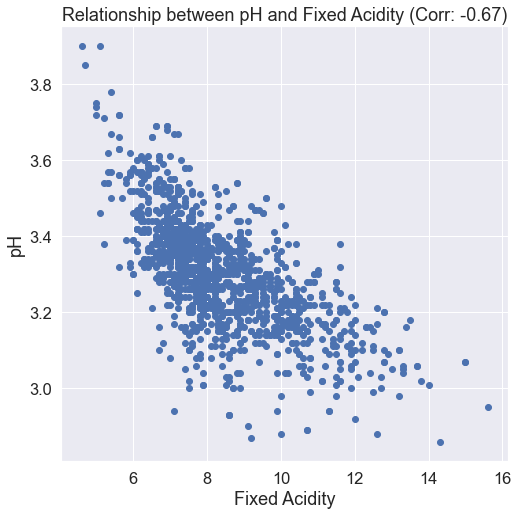

In [22]:
corr = 'Corr: %.2f' % df['pH'].corr(df['fixed acidity'])
corr_plot(df['fixed acidity'], 'Fixed Acidity', df['pH'], 'pH', 
          'Relationship between pH and Fixed Acidity ({})'.format(corr))

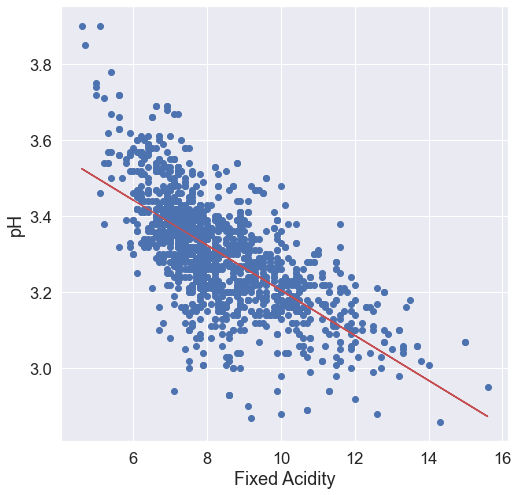

In [23]:
plot_relationship_best_fit(df['fixed acidity'], 'Fixed Acidity', df['pH'], 'pH')

#### Free Sulfur Dioxide & Total Sulfur Dioxide ####

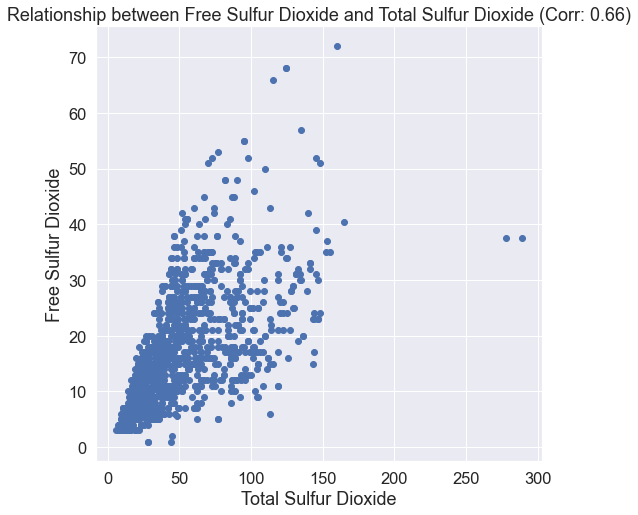

In [24]:
corr = 'Corr: %.2f' % df['free sulfur dioxide'].corr(df['total sulfur dioxide'])
corr_plot(df['total sulfur dioxide'], 'Total Sulfur Dioxide', df['free sulfur dioxide'], 'Free Sulfur Dioxide', 
          'Relationship between Free Sulfur Dioxide and Total Sulfur Dioxide ({})'.format(corr))

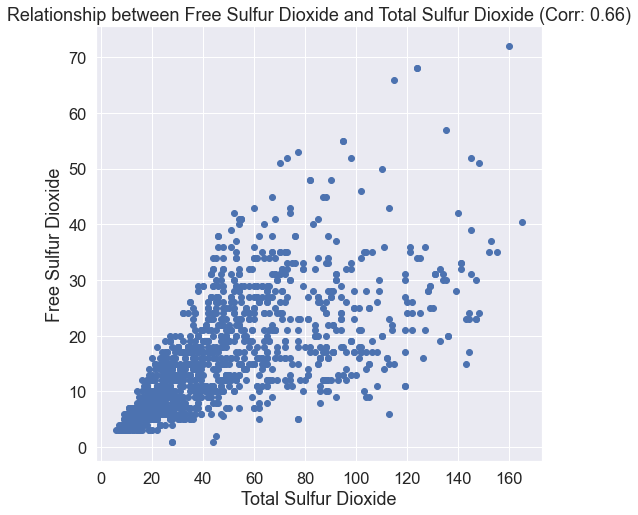

In [25]:
df = df[df['total sulfur dioxide'] < 250]

corr_plot(df['total sulfur dioxide'], 'Total Sulfur Dioxide', df['free sulfur dioxide'], 'Free Sulfur Dioxide', 
          'Relationship between Free Sulfur Dioxide and Total Sulfur Dioxide ({})'.format(corr))

In [26]:
df.shape

(1384, 12)

# Feature Engineering #

In [27]:
df['total acidity'] = df['fixed acidity'] + df['volatile acidity']
df['fixed acidity citric acid'] = df['fixed acidity'] * df['citric acid']
df['fixed acidity density'] = df['fixed acidity'] * df['density']
df['fixed acidity pH'] = df['fixed acidity'] * df['pH']
df['volatile acidity citric acid'] = df['volatile acidity'] * df['citric acid']
df['citric acid pH'] = df['citric acid'] * df['pH']
df['sulfur dioxide content'] = df['total sulfur dioxide'] * df['free sulfur dioxide']
df['alcohol density'] = df['alcohol'] * df['density']
df['alcohol quality'] = df['alcohol'] * df['quality']


df.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'pH', 'total sulfur dioxide', 
         'free sulfur dioxide', 'alcohol'], axis=1, inplace=True)
df = df.reset_index(drop=True)

In [28]:
random_state = 42
target = df['quality']
features = df.drop('quality', axis=1)
features.shape

(1384, 12)

In [29]:
df.shape

(1384, 13)

# Feature Scaling and Test/Train Split#

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=random_state)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1038, 12)
(346, 12)
(1038,)
(346,)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model #

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=random_state)

def experimentation_scores(scores):
    return scores.mean()

### Decision Tree Regressor ###

In [33]:
model = DecisionTreeRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
dtr_score = experimentation_scores(scores)

### Linear Regressor ###

In [34]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
lr_score = experimentation_scores(scores)

### Ridge ###

In [35]:
model = Ridge(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
ri_score = experimentation_scores(scores)

### ElasticNet ###

In [36]:
model = ElasticNet(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
el_score = experimentation_scores(scores)

### Gradient Boosting Regressor ###

In [37]:
model = GradientBoostingRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
gbr_score = experimentation_scores(scores)

### Random Forest Regressor ###

In [38]:
model = RandomForestRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
rfr_score = experimentation_scores(scores)

### Ada Boost Regressor ###

In [39]:
model = AdaBoostRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
abr_score = experimentation_scores(scores)

### SVR ###

In [40]:
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
svr_score = experimentation_scores(scores)

In [41]:
#Scores

print(['Decision Tree Regressor',round(dtr_score*100,2)])
print(['Logistic Regression',round(lr_score*100,2)])
print(['Ridge',round(ri_score*100,2)])
print(['ElasticNet',round(el_score*100,2)])
print(['Gradient Boosting Regressor',round(gbr_score*100,2)])
print(['Random Forest Regressor',round(rfr_score*100,2)])
print(['Ada Boost Regressor',round(abr_score*100,2)])
print(['SVR',round(svr_score*100,2)])

['Decision Tree Regressor', 96.96]
['Logistic Regression', 99.02]
['Ridge', 99.03]
['ElasticNet', 28.84]
['Gradient Boosting Regressor', 99.1]
['Random Forest Regressor', 98.11]
['Ada Boost Regressor', 90.88]
['SVR', 95.12]


Plot default performance.

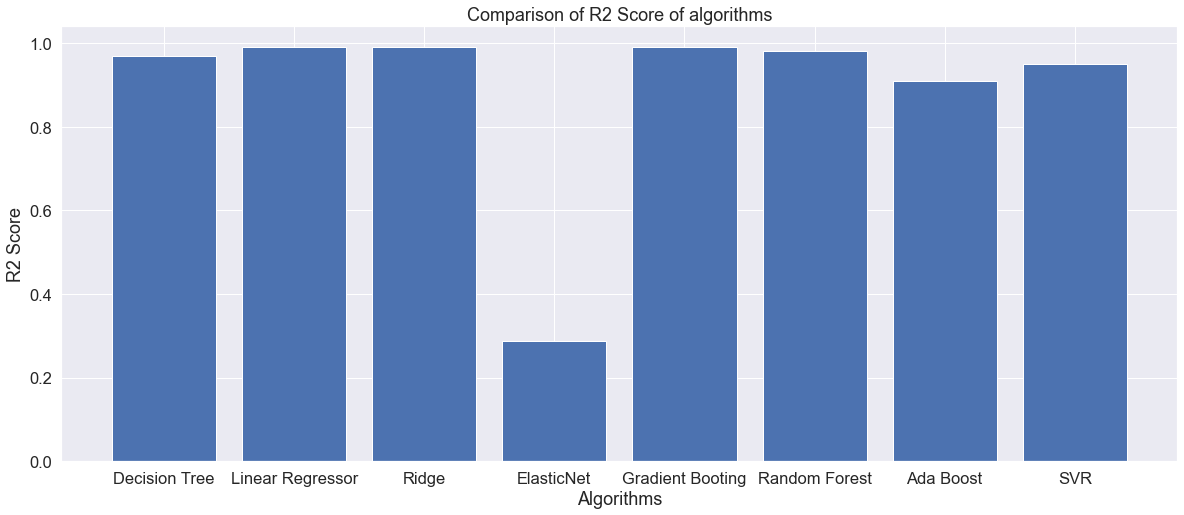

In [42]:
x = np.arange(8)
plt.figure(figsize=(20, 8))
plt.bar(x, [dtr_score, lr_score, ri_score, el_score, gbr_score, rfr_score, abr_score, svr_score])
plt.xticks(x, ('Decision Tree', 'Linear Regressor', 'Ridge', 'ElasticNet', 'Gradient Booting', 'Random Forest', 
               'Ada Boost', 'SVR'))
plt.title('Comparison of R2 Score of algorithms')
plt.xlabel('Algorithms')
plt.ylabel('R2 Score')
plt.show()

Using default values, LinearRegressor, Ridge and GradientBoostingRegressor performs better than the other algorithms. Since there are 3 options to choose from, LinearRegressor will be used to trian the model.

# Training the model #

In [43]:
model = LinearRegression()

In [44]:
from sklearn.model_selection import learning_curve

scoring = 'r2'
n_jobs = -1
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=cv, 
                                                         scoring=scoring, n_jobs=n_jobs, verbose=1)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

[learning_curve] Training set sizes: [ 93 303 513 723 934]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.2s finished


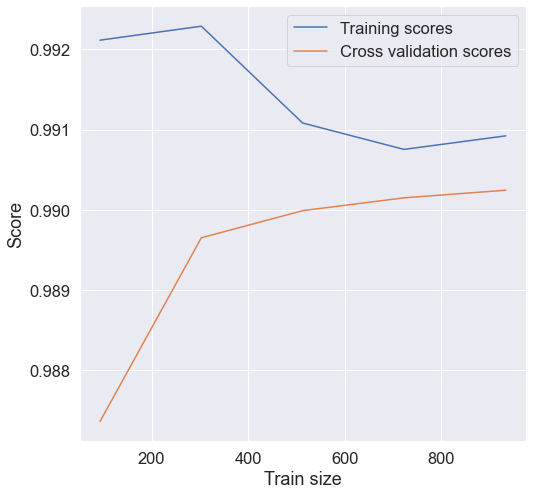

In [45]:
plt.figure(figsize=(8, 8))
plt.plot(train_sizes, train_scores_mean, label='Training scores')
plt.plot(train_sizes, val_scores_mean, label='Cross validation scores')
plt.xlabel('Train size')
plt.ylabel('Score')
plt.legend()
plt.show()

### Fit model and make predictions ###

In [46]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluation and Scores #

In [47]:
score = model.score(X_test, y_test)
print('Score: %.3f' % score)

Score: 0.990


In [48]:
#We got 99% Accuracy with our model.

The plot below compares the predictions of the model with the corresponding ground-truth values.

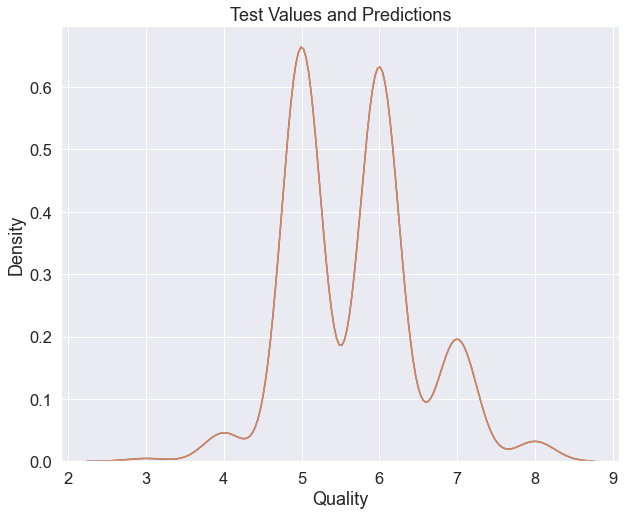

In [49]:
def evaluation_plot(y_test, predictions):
    plt.figure(figsize=(10, 8))

    # Density plot of the final predictions and the test values
    sns.kdeplot(predictions, label='Model Predictions')
    sns.kdeplot(y_test, label='Test Values')

    # Label the plot
    plt.xlabel('Quality')
    plt.ylabel('Density')
    plt.title('Test Values and Predictions')
    plt.show()

evaluation_plot(y_test, np.round(predictions))

In [50]:
#Hence different Machine Learning models were implemented on the given dataset and the accuracy rates were observed.